In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import time 
import datetime

df = pd.read_csv('D:/390 Project/S&P/data.csv')
print('Are there any NaNs?',df.isnull().values.any())
print(df.dtypes,'\n')
print(df)
print(df['signal'].corr(df['spy_close_price']))


Are there any NaNs? False
date                 int64
signal             float64
spy_close_price    float64
dtype: object 

         date    signal  spy_close_price
0    20120103  3.107767          127.495
1    20120104  3.107282          127.700
2    20120105  3.099757          128.040
3    20120106  3.134223          127.710
4    20120109  3.135922          128.020
5    20120110  3.143447          129.130
6    20120111  3.127184          129.200
7    20120112  3.139320          129.510
8    20120113  3.174029          128.840
9    20120117  3.190777          129.340
10   20120118  3.202670          130.770
11   20120119  3.194417          131.460
12   20120120  3.190777          131.950
13   20120123  3.217476          131.610
14   20120124  3.200971          131.460
15   20120125  3.199515          132.560
16   20120126  3.188592          131.880
17   20120127  3.187379          131.820
18   20120130  3.215291          131.370
19   20120131  3.220388          131.320
20   20120201  3

In [3]:
def toDate(day):
    #day = str(day)
    #date = map(int, str(day))
    #date.insert()
    x = str(day)
    date = list(x)
    date.insert(4,':')
    date.insert(7,':')
    result = ''.join(date)
    return result
df['epoch'] = df['date'].apply(toDate)
print(df)

         date    signal  spy_close_price       epoch
0    20120103  3.107767          127.495  2012:01:03
1    20120104  3.107282          127.700  2012:01:04
2    20120105  3.099757          128.040  2012:01:05
3    20120106  3.134223          127.710  2012:01:06
4    20120109  3.135922          128.020  2012:01:09
5    20120110  3.143447          129.130  2012:01:10
6    20120111  3.127184          129.200  2012:01:11
7    20120112  3.139320          129.510  2012:01:12
8    20120113  3.174029          128.840  2012:01:13
9    20120117  3.190777          129.340  2012:01:17
10   20120118  3.202670          130.770  2012:01:18
11   20120119  3.194417          131.460  2012:01:19
12   20120120  3.190777          131.950  2012:01:20
13   20120123  3.217476          131.610  2012:01:23
14   20120124  3.200971          131.460  2012:01:24
15   20120125  3.199515          132.560  2012:01:25
16   20120126  3.188592          131.880  2012:01:26
17   20120127  3.187379          131.820  2012

In [4]:
df['epoch'] = pd.to_timedelta(df['epoch'])
df['epoch seconds'] = df['epoch'].dt.total_seconds()
df.drop(['date'],axis=1,inplace=True)
df.drop(['epoch'],axis=1,inplace=True)
print(df)

       signal  spy_close_price  epoch seconds
0    3.107767          127.495      7243263.0
1    3.107282          127.700      7243264.0
2    3.099757          128.040      7243265.0
3    3.134223          127.710      7243266.0
4    3.135922          128.020      7243269.0
5    3.143447          129.130      7243270.0
6    3.127184          129.200      7243271.0
7    3.139320          129.510      7243272.0
8    3.174029          128.840      7243273.0
9    3.190777          129.340      7243277.0
10   3.202670          130.770      7243278.0
11   3.194417          131.460      7243279.0
12   3.190777          131.950      7243280.0
13   3.217476          131.610      7243283.0
14   3.200971          131.460      7243284.0
15   3.199515          132.560      7243285.0
16   3.188592          131.880      7243286.0
17   3.187379          131.820      7243287.0
18   3.215291          131.370      7243290.0
19   3.220388          131.320      7243291.0
20   3.263350          132.470    

Components:
 [[ 0.08618805  0.70434516  0.70460593]
 [ 0.99626956 -0.06399274 -0.05789556]
 [ 0.00431121  0.70696734 -0.70723305]]
Explained Variance Results:
 [1.54104743 0.99747351 0.46598356]
Explained Variance Ratio:
 [0.51291234 0.33199268 0.15509498]
(1797, 64)
(1797, 2)


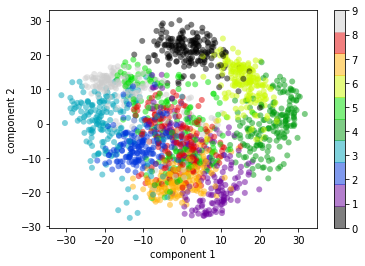

In [5]:
x = df.iloc[:,:]
scaler = StandardScaler()
x = scaler.fit_transform(x)
pca = PCA()
PCs = pca.fit_transform(x)
PCs.shape
varRatio = pca.explained_variance_ratio_
print('Components:\n',pca.components_)
print('Explained Variance Results:\n',pca.explained_variance_)
print('Explained Variance Ratio:\n',pca.explained_variance_ratio_)
digits = load_digits()
digits.data.shape
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolor='none',
           alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

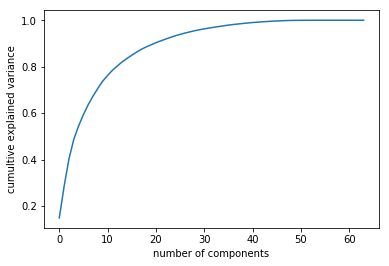

In [6]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumultive explained variance')
plt.show()

In [7]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(varRatio*100)
x = pca.explained_variance_ratio_,'signal'
print(x)
y = pca.explained_variance_ratio_,'epoch seconds'
print(y)
sum = 0
memex = list(x)
memey = list(y)
memex.pop()
memey.pop()

[51.291234 33.199268 15.509498]
(array([0.148906, 0.136188, 0.117946, 0.084100, 0.057824, 0.049169,
       0.043160, 0.036614, 0.033532, 0.030788, 0.023723, 0.022727,
       0.018219, 0.017739, 0.014671, 0.014097, 0.013186, 0.012481,
       0.010177, 0.009056, 0.008895, 0.007971, 0.007675, 0.007229,
       0.006959, 0.005961, 0.005756, 0.005152, 0.004895, 0.004289,
       0.003736, 0.003533, 0.003367, 0.003280, 0.003083, 0.002938,
       0.002566, 0.002277, 0.002223, 0.002114, 0.001899, 0.001587,
       0.001512, 0.001406, 0.001166, 0.001075, 0.000964, 0.000775,
       0.000557, 0.000404, 0.000210, 0.000082, 0.000053, 0.000051,
       0.000033, 0.000012, 0.000007, 0.000003, 0.000001, 0.000001,
       0.000000, 0.000000, 0.000000, 0.000000]), 'signal')
(array([0.148906, 0.136188, 0.117946, 0.084100, 0.057824, 0.049169,
       0.043160, 0.036614, 0.033532, 0.030788, 0.023723, 0.022727,
       0.018219, 0.017739, 0.014671, 0.014097, 0.013186, 0.012481,
       0.010177, 0.009056, 0.008895,

'epoch seconds'

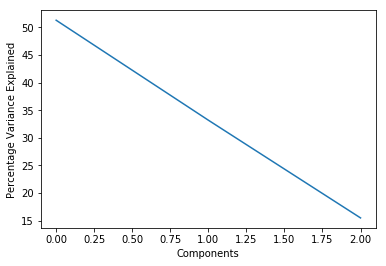

In [8]:
plt.plot(varRatio*100)
plt.ylabel('Percentage Variance Explained')
plt.xlabel('Components')
plt.show()

## Post Data Cleaning Summary:
At the start of this project the obvious first step was to read in and clean all of the data we were given. To do this we used libraries like pandas for reading in the data and creating a dataframe, numpy to do some math on the data, matplotlib to create plots of our data, time and datetime to convert the date to a usable unit, and PCA and standard scaler to analyze our data more. So to start to clean the data the first thing done was checking for nan values in the data to see if anything needed to be filled in or dropped from our data. Next we took the string that was representng our dates and changed it to have colons separate the years, months, and days so we could use to_timedelta which converted them to epoch time that we could now use. After this we scaled all our data and performed PCA on it to determine if anything should be dropped from our data. We realized that the dates in the end weren't very important to our data and weren't actually indicative of anything related to the close price after all this.

# Beginning Of Linear Regression Model Work

## Results w/Outliers Still in the Data

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
noDateDF = df[['signal','spy_close_price']]
print(df['signal'].corr(df['spy_close_price']))
x = noDateDF.as_matrix(columns=df.columns[0:1])
y = noDateDF.as_matrix(columns=df.columns[1:2])
sigData = noDateDF['signal']
closePrice = noDateDF['spy_close_price']
sigData_train, sigData_test, closePrice_train, closePrice_test = train_test_split(x,y,test_size=0.2,random_state=101)
linReg = LinearRegression()
linReg.fit(sigData_train,closePrice_train)
prediction = linReg.predict(sigData_test)
print(linReg.predict([[4.86]]))

0.03133130896399012
[[163.490356]]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


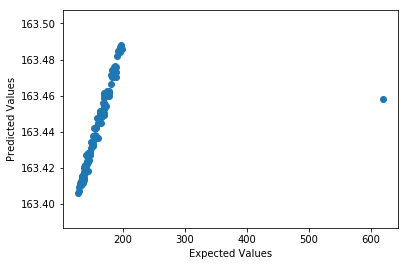

In [10]:
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(closePrice_test,prediction)

In [11]:
print('Evaluation Of Our Linear Regression Model:')
print('Mean Absolute Error:',metrics.mean_absolute_error(closePrice_test,prediction))
print('Mean Squared Error:',metrics.mean_squared_error(closePrice_test,prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(closePrice_test,prediction)))
print('R Squared Score:', metrics.r2_score(closePrice_test,prediction))

Evaluation Of Our Linear Regression Model:
Mean Absolute Error: 20.705491542241713
Mean Squared Error: 1957.6351882686513
Root Mean Squared Error: 44.24517135539935
R Squared Score: -0.0009145595427382247


As you can see in the results above the extreme outliers are causing odd graphs where we do have some fairly linear data but with some extreme outliers that are messing with the results of our prediction which you can somewhat see when we print a predicted price for a signal of 4.86 that is very off. Also you can look at our metrics and you'll see that we are WAY OFF of what it should be (how these metrics are evaluated and their meaning will be discussed further below).

## Results w/o Outliers in the Data

       signal  spy_close_price
0    3.107767          127.495
1    3.107282          127.700
2    3.099757          128.040
3    3.134223          127.710
4    3.135922          128.020
5    3.143447          129.130
6    3.127184          129.200
7    3.139320          129.510
8    3.174029          128.840
9    3.190777          129.340
10   3.202670          130.770
11   3.194417          131.460
12   3.190777          131.950
13   3.217476          131.610
14   3.200971          131.460
15   3.199515          132.560
16   3.188592          131.880
17   3.187379          131.820
18   3.215291          131.370
19   3.220388          131.320
20   3.263350          132.470
21   3.265534          132.680
22   3.271602          134.540
23   3.281311          134.450
24   3.285437          134.790
25   3.261189          135.190
26   3.285437          135.360
27   3.281311          134.361
28   3.266019          135.360
29   3.302160          135.190
..        ...              ...
637  4.8

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


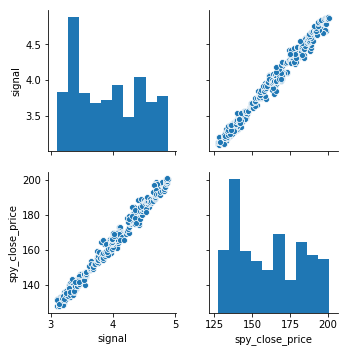

In [12]:
#noDateDF[(np.abs(stats.zscore(noDateDF)) < 3).all(axis=1)]
q1 = noDateDF.quantile(0.25)
q3 = noDateDF.quantile(0.75)
iqr = q3-q1
noDateDF = noDateDF[~((noDateDF < (q1-1.5*iqr)) | (noDateDF > (q3+1.5*iqr))).any(axis=1)]
print(noDateDF)
print(df['signal'].corr(df['spy_close_price']))
print(sns.pairplot(noDateDF))
x = noDateDF.as_matrix(columns=df.columns[0:1])
y = noDateDF.as_matrix(columns=df.columns[1:2])
print(max(x))
print(max(y))
#print(sns.distplot(noDateDF['signal']))
sigData = noDateDF['signal']
closePrice = noDateDF['spy_close_price']
sigData_train, sigData_test, closePrice_train, closePrice_test = train_test_split(x,y,test_size=0.2,random_state=101)
linReg = LinearRegression()
linReg.fit(sigData_train,closePrice_train)
prediction = linReg.predict(sigData_test)
#plt.scatter(closePrice_test,prediction)
#noDateDF.plot(x='signal',y='spy_close_price',style='o')
#PROBLEM IS THAT WE HAVE !!!!!EXTREME!!!!! OUTLIERS GET RID OF 
#THEM TO FIX THE REGRESSION PLOT

In [13]:
#plt.scatter(noDateDF['spy_close_price'],noDateDF['signal'])

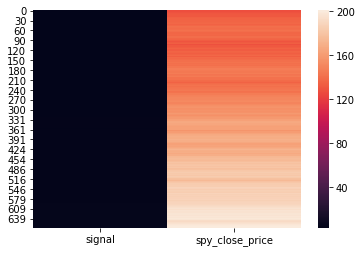

In [14]:
sns.heatmap(noDateDF)

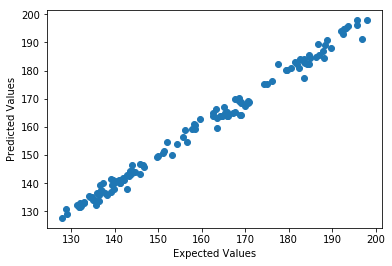

In [15]:
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(closePrice_test,prediction)

In [16]:
print(linReg.predict([[4.86]]))

[[199.429906]]


## Recap Of What's Been Done With The Clean Data So Far:
In this step when creating the linear regression model originally I noticed that the data was odd and what I realized in going through the results I realized what was going on when I printed the max of the signal column. The issue was that we had EXTREME outliers (about 100x what they usually were) that needed to be dealt with if we wanted an accurate model. So those were removed along with the epoch column from the dataframe and the result was a new dateframe called noDateDF without outliers and without the epoch column. This dataframe is what was used and so we now split the data into testing and training data and finished our model. Some models are shown above with the results of what we did. After a little tweaking of the ratio of how much data was put into testing and training we somewhat of a sweet spot to give us the best metrics. To do all this we used sklearn to help with creating our model and seaborn to help us visualize the data a little more.

In [17]:
print('Evaluation Of Our Linear Regression Model:')
print('Mean Absolute Error:',metrics.mean_absolute_error(closePrice_test,prediction))
print('Mean Squared Error:',metrics.mean_squared_error(closePrice_test,prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(closePrice_test,prediction)))
print('R Squared Score:', metrics.r2_score(closePrice_test,prediction))

Evaluation Of Our Linear Regression Model:
Mean Absolute Error: 1.4083372300308512
Mean Squared Error: 3.5217486839899093
Root Mean Squared Error: 1.8766322719142152
R Squared Score: 0.9915350721623483


In [18]:
print(metrics.mean_absolute_error(closePrice_test,prediction) / min(y) * 100)
print(metrics.mean_absolute_error(closePrice_test,prediction) / max(y) * 100)

[1.104622]
[0.701678]


Residuals


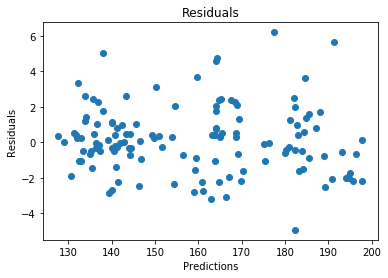

In [19]:
print('Residuals')
residuals = [closePrice_test[i]-prediction[i] for i in range(len(prediction))]
residuals = np.array(residuals)
plt.scatter(prediction, residuals)
plt.title('Residuals')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

## Interpretation Of The Results Of Our Linear Regression Model Evaluation:
The results yielded for MAE, MSE, R squared, and RMSE seem to be the best results we can get after time was spent tweaking the sizes of the training and test sets until we got to the lowest values could find for these metrics.<br><br>
The first metric used to evaluate the model is the mean absolute error which represents our average error on each of our predicted values compared to what was expected. From what is shown in the cell above we can see that we were on average only 1.1% off when looking at our smallest closing price and .7% off when looking at our highest closing price assuming we were off by the average in those cases which is fairly accurate.<br><br>
The second metric used was mean squared error. This metric gives us the average magnitude of the error in our predictions but doesn't tell us in what direction the magnitude is. What this is doing is trying to find the line of best fit for our data and since our data is fairly linear and not too scattered we were able to get the error down moderately low but it is possible some tweaking may be done to help lower this more. However, since this isn't in base units we take the square root of it for the next metric.<br><br>
The next metric used is root mean squared error which as mentioned before is just the square root of our previous metric putting it in base units that are more interpretable. RMSE is used to indicate the abolute measure of fit and is an important metric to us when it comes to evaluating our model for predictions. What this is telling us is the square root of the squared difference between what we expected and what we got.<br><br>
Another important metric for us is the R Squared score. R-squared score is an important metric that tells us how close our data is to the fitted regression line. It is sometimes known as the coefficient of determination. As we can see above, our calculation shows that our R Squared Score is 99%, which is a huge improvement after we removed the outliers. With the outliers, our R Squared score was around 0%, which means that our model with outliers was no where close to the fitted regression line. After removing outliers, the model showed that it could explain 99% of the variance. <br><br>
The final thing we look at is residuals. Residuals is basically just the difference between the observed values and the predicted values, or also just known as errors. Residuals is a key component when assessing the quality of a model. Ideally, a good model's residual plot should not have a pattern, and points should be randomly dispersed throughout the graph. A sign of a pattern suggests that the the errors are not random. As shown in our residual graph, our scatterplot is random with a lot of points focused somewhere around 0 for residual axis. The scatterplot is also randomly dispersed indicating that our model is accurate and that errors only happen from random fluctuations in the time series that can't be controlled.<br><br>
Overall signal seems to be a very good predictor of future stock prices in our case. While it has its shortcomings in that a higher signal does not always seem to correlate with higher price it does in almost all cases which helps its viability as a predictor for prices.

## Process To Get These Linear Regression Results
The first thing to do to get these results was to consult guides online and documentation as we began working on this before going over linear regression for predictions in class. Thankfully it was fairly straightforward and the first step was to split the data into training and testing data to check the accuracy of our predictions. After this we imported a linear regression model from sklearn and used the .fit method to give it our training and testing data and then used that to predict. As mentioned previously a problem that was encountered at this point was the existence of extreme outliers in our dataset that threw off the predictions by a significant amount. As such those were removed from the dataset and after using the same code on the fixed dataset we were able to get our mostly accurate results.

# Beginning Of Neural Network 

In [20]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [146]:
#sigData_train, sigData_test, closePrice_train, closePrice_test = train_test_split(x,y,test_size=0.5,random_state=101)
#training_set_sig = noDateDF['signal']
#training_set_sig = pd.DataFrame(training_set_sig)
#sc = MinMaxScaler(feature_range = (0,1))
#closePrice_train = sc.fit_transform(closePrice_train)
#x_train = []
#y_train = []
#for i in range(60,300):
#    x_train.append(closePrice_train[i-60:i,0])
#    y_train.append(closePrice_train[i,0])
#x_train, y_train = np.array(x_train),np.array(y_train)
#print(x_train)
#x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
#x_train = x_train.reshape(-1,1)
#scaledTrainingSet = sc.fit_transform(training_set_sig)
#sigData_train = sigData_train.reshape(-1,1)
#sigData_test = sigData_test.reshape(-1,1)


#scaler.fit(sigData_train[i+smoothing_window_size:,:])
#sigData_train[i+smoothing_window_size:,:] = scaler.transform(sigData_train[i+smoothing_window_size:,:])

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers

Using TensorFlow backend.


In [148]:
#regressor = Sequential()
#regressor.add(LSTM(units = 32,  return_sequences = True, input_shape = (x_train.shape[1],1)))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 32,  return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 32,  return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = 32))
#regressor.add(Dropout(0.2))

#regressor.add(Dense(units = 1))

In [149]:
#regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

In [150]:
#closePrice_tests = pd.DataFrame(closePrice_test)
#closePrice_trains = pd.DataFrame(closePrice_train)

In [151]:
#total = pd.concat((closePrice_trains,closePrice_tests),axis=0)
#inputs = total[len(total)-len(closePrice_tests) - 60:].values
#inputs = inputs.reshape(-1,1)
#inputs = sc.transform(inputs)
#print(inputs.size)
#closePrice_test = closePrice_test.reshape(-1,1)
#print(closePrice_test)
#closePrice_test = sc.transform(closePrice_test)
#print(closePrice_test)
#x_test = []
#for i in range(60,80):
#    x_test.append(inputs[i-60:i,0])
#x_test = np.array(x_test)
#print(x_test.size)
#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#predicted = regressor.predict(x_test)
#predicted = sc.inverse_transform(predicted)
#print(predicted)

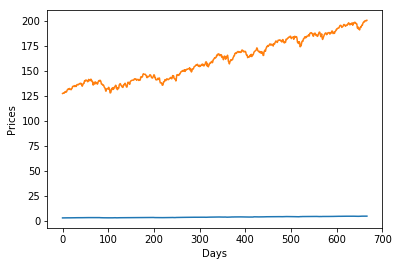

In [154]:
plt.figure()
plt.plot(noDateDF['signal'])
plt.plot(noDateDF['spy_close_price'])
plt.xlabel('Days')
plt.ylabel('Prices')
plt.show()

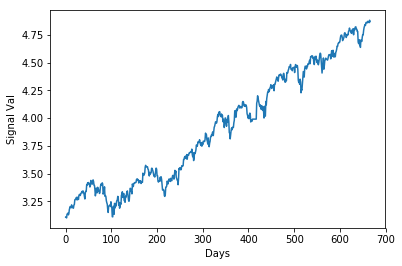

In [155]:
plt.figure()
plt.plot(noDateDF['signal'])
plt.xlabel('Days')
plt.ylabel('Signal Val')
plt.show()

Possible Thing to Note:
The trends of signal and trends of prices seem to be pretty highly correlated when looking at these graphs.

In [22]:
noDateDF['signal'].corr(noDateDF['spy_close_price'])

0.9950776193900056

Note from before confirmed by the above correlation of over 99%

In [39]:
#train_col = ['spy_close_price']
#closePrice_train, closePrice_test = train_test_split(noDateDF, train_size=.7, test_size=.3,shuffle=False)
##print('Training Set Size:',len(closePrice_train), '\nTest Set Size:',len(closePrice_test))
#closePrice_train = closePrice_train.drop(['signal'],axis=1)
#closePrice_test = closePrice_test.drop(['signal'],axis=1)
#x = closePrice_train.loc[:,train_col].values
#sc = MinMaxScaler()
#price_train = sc.fit_transform(x)
#price_test = sc.transform(closePrice_test.loc[:,train_col])
#print(price_train.size)

460


In [42]:
#from tqdm._tqdm_notebook import tqdm_notebook
#time_steps = 100
#batch = 32

#def build_timeseries(mat, index):
#    dim_0 = mat.shape[0] - time_steps
#    dim_1 = mat.shape[1]
#    x = np.zeros((dim_0, time_steps, dim_1))
#    y = np.zeros((dim_0,))
#    for i in tqdm_notebook(range(dim_0)):
#        x[i] = mat[i:time_steps+i]
#        y[i] = mat[time_steps+i,index]
#    print(x.shape,y.shape)
#    return x,y

#def trim(mat,batch_size):
#    number_of_drop_rows = mat.shape[0]%batch_size
#    if(number_of_drop_rows > 0):
#        return mat[:-number_of_drop_rows]
#    else:
#        return mat

In [43]:
#x_t, y_t = build_timeseries(price_train, 0)
#x_t = trim(x_t,batch)
#y_t = trim(y_t,batch)
#x_temp, y_temp = build_timeseries(price_test, 0)
#x_val, x_tester = np.split(trim(x_temp,batch),2)
#y_val, y_tester = np.split(trim(y_temp,batch),2)


(360, 100, 1) (360,)



(98, 100, 1) (98,)


In [44]:
#lstm_model = Sequential()
#lstm_model.add(LSTM(100, batch_input_shape=(batch,time_steps,x_t.shape[2]),dropout=0.0,recurrent_dropout=0.0,stateful=True,kernel_initializer='random_uniform'))
#lstm_model.add(Dropout(0.2))
#lstm_model.add(Dense(20,activation='relu'))
#lstm_model.add(Dense(1,activation='sigmoid'))
#optimizer = optimizers.RMSprop(lr = .0001)
#lstm_model.compile(loss='mean_squared_error',optimizer= optimizer)

In [47]:
#result = lstm_model.fit(x_t,y_t,epochs=1500,verbose=2,batch_size = batch,shuffle=False,validation_data=(trim(x_val,batch),trim(y_val,batch)))

Train on 352 samples, validate on 32 samples
Epoch 1/1500
 - 1s - loss: 0.0624 - val_loss: 0.4755
Epoch 2/1500
 - 1s - loss: 0.0622 - val_loss: 0.4720
Epoch 3/1500
 - 1s - loss: 0.0617 - val_loss: 0.4686
Epoch 4/1500
 - 1s - loss: 0.0615 - val_loss: 0.4655
Epoch 5/1500
 - 1s - loss: 0.0612 - val_loss: 0.4627
Epoch 6/1500
 - 1s - loss: 0.0609 - val_loss: 0.4599
Epoch 7/1500
 - 1s - loss: 0.0606 - val_loss: 0.4586
Epoch 8/1500
 - 1s - loss: 0.0603 - val_loss: 0.4571
Epoch 9/1500
 - 1s - loss: 0.0599 - val_loss: 0.4554
Epoch 10/1500
 - 1s - loss: 0.0595 - val_loss: 0.4538
Epoch 11/1500
 - 1s - loss: 0.0591 - val_loss: 0.4521
Epoch 12/1500
 - 1s - loss: 0.0585 - val_loss: 0.4504
Epoch 13/1500
 - 1s - loss: 0.0579 - val_loss: 0.4485
Epoch 14/1500
 - 1s - loss: 0.0573 - val_loss: 0.4464
Epoch 15/1500
 - 1s - loss: 0.0564 - val_loss: 0.4440
Epoch 16/1500
 - 1s - loss: 0.0552 - val_loss: 0.4410
Epoch 17/1500
 - 1s - loss: 0.0539 - val_loss: 0.4372
Epoch 18/1500
 - 1s - loss: 0.0518 - val_loss:

Epoch 300/1500
 - 1s - loss: 0.0027 - val_loss: 0.0470
Epoch 301/1500
 - 1s - loss: 0.0027 - val_loss: 0.0465
Epoch 302/1500
 - 1s - loss: 0.0033 - val_loss: 0.0481
Epoch 303/1500
 - 1s - loss: 0.0026 - val_loss: 0.0477
Epoch 304/1500
 - 1s - loss: 0.0025 - val_loss: 0.0477
Epoch 305/1500
 - 1s - loss: 0.0028 - val_loss: 0.0469
Epoch 306/1500
 - 1s - loss: 0.0027 - val_loss: 0.0467
Epoch 307/1500
 - 1s - loss: 0.0027 - val_loss: 0.0467
Epoch 308/1500
 - 1s - loss: 0.0025 - val_loss: 0.0460
Epoch 309/1500
 - 1s - loss: 0.0061 - val_loss: 0.0481
Epoch 310/1500
 - 1s - loss: 0.0029 - val_loss: 0.0475
Epoch 311/1500
 - 1s - loss: 0.0028 - val_loss: 0.0471
Epoch 312/1500
 - 1s - loss: 0.0026 - val_loss: 0.0469
Epoch 313/1500
 - 1s - loss: 0.0025 - val_loss: 0.0469
Epoch 314/1500
 - 1s - loss: 0.0025 - val_loss: 0.0467
Epoch 315/1500
 - 1s - loss: 0.0027 - val_loss: 0.0465
Epoch 316/1500
 - 1s - loss: 0.0027 - val_loss: 0.0456
Epoch 317/1500
 - 1s - loss: 0.0025 - val_loss: 0.0468
Epoch 318/

Epoch 449/1500
 - 1s - loss: 0.0029 - val_loss: 0.0437
Epoch 450/1500
 - 1s - loss: 0.0027 - val_loss: 0.0435
Epoch 451/1500
 - 1s - loss: 0.0026 - val_loss: 0.0432
Epoch 452/1500
 - 1s - loss: 0.0024 - val_loss: 0.0431
Epoch 453/1500
 - 1s - loss: 0.0022 - val_loss: 0.0429
Epoch 454/1500
 - 1s - loss: 0.0022 - val_loss: 0.0431
Epoch 455/1500
 - 1s - loss: 0.0024 - val_loss: 0.0428
Epoch 456/1500
 - 1s - loss: 0.0025 - val_loss: 0.0424
Epoch 457/1500
 - 1s - loss: 0.0024 - val_loss: 0.0422
Epoch 458/1500
 - 1s - loss: 0.0024 - val_loss: 0.0425
Epoch 459/1500
 - 1s - loss: 0.0023 - val_loss: 0.0416
Epoch 460/1500
 - 1s - loss: 0.0258 - val_loss: 0.0435
Epoch 461/1500
 - 1s - loss: 0.0028 - val_loss: 0.0434
Epoch 462/1500
 - 1s - loss: 0.0026 - val_loss: 0.0432
Epoch 463/1500
 - 1s - loss: 0.0023 - val_loss: 0.0429
Epoch 464/1500
 - 1s - loss: 0.0024 - val_loss: 0.0427
Epoch 465/1500
 - 1s - loss: 0.0023 - val_loss: 0.0426
Epoch 466/1500
 - 1s - loss: 0.0023 - val_loss: 0.0426
Epoch 467/

Epoch 598/1500
 - 1s - loss: 0.0025 - val_loss: 0.0411
Epoch 599/1500
 - 1s - loss: 0.0022 - val_loss: 0.0407
Epoch 600/1500
 - 1s - loss: 0.0020 - val_loss: 0.0406
Epoch 601/1500
 - 1s - loss: 0.0021 - val_loss: 0.0405
Epoch 602/1500
 - 1s - loss: 0.0022 - val_loss: 0.0404
Epoch 603/1500
 - 1s - loss: 0.0020 - val_loss: 0.0402
Epoch 604/1500
 - 1s - loss: 0.0020 - val_loss: 0.0401
Epoch 605/1500
 - 1s - loss: 0.0021 - val_loss: 0.0400
Epoch 606/1500
 - 1s - loss: 0.0045 - val_loss: 0.0414
Epoch 607/1500
 - 1s - loss: 0.0022 - val_loss: 0.0411
Epoch 608/1500
 - 1s - loss: 0.0021 - val_loss: 0.0409
Epoch 609/1500
 - 1s - loss: 0.0020 - val_loss: 0.0409
Epoch 610/1500
 - 1s - loss: 0.0020 - val_loss: 0.0407
Epoch 611/1500
 - 1s - loss: 0.0021 - val_loss: 0.0406
Epoch 612/1500
 - 1s - loss: 0.0021 - val_loss: 0.0404
Epoch 613/1500
 - 1s - loss: 0.0020 - val_loss: 0.0403
Epoch 614/1500
 - 1s - loss: 0.0020 - val_loss: 0.0402
Epoch 615/1500
 - 1s - loss: 0.0020 - val_loss: 0.0404
Epoch 616/

Epoch 747/1500
 - 1s - loss: 0.0023 - val_loss: 0.0402
Epoch 748/1500
 - 1s - loss: 0.0017 - val_loss: 0.0401
Epoch 749/1500
 - 1s - loss: 0.0016 - val_loss: 0.0399
Epoch 750/1500
 - 1s - loss: 0.0017 - val_loss: 0.0395
Epoch 751/1500
 - 1s - loss: 0.0017 - val_loss: 0.0405
Epoch 752/1500
 - 1s - loss: 0.0019 - val_loss: 0.0391
Epoch 753/1500
 - 1s - loss: 0.0017 - val_loss: 0.0392
Epoch 754/1500
 - 1s - loss: 0.0016 - val_loss: 0.0394
Epoch 755/1500
 - 1s - loss: 0.0016 - val_loss: 0.0387
Epoch 756/1500
 - 1s - loss: 0.0100 - val_loss: 0.0400
Epoch 757/1500
 - 1s - loss: 0.0018 - val_loss: 0.0399
Epoch 758/1500
 - 1s - loss: 0.0016 - val_loss: 0.0398
Epoch 759/1500
 - 1s - loss: 0.0016 - val_loss: 0.0398
Epoch 760/1500
 - 1s - loss: 0.0017 - val_loss: 0.0396
Epoch 761/1500
 - 1s - loss: 0.0015 - val_loss: 0.0398
Epoch 762/1500
 - 1s - loss: 0.0018 - val_loss: 0.0392
Epoch 763/1500
 - 1s - loss: 0.0018 - val_loss: 0.0403
Epoch 764/1500
 - 1s - loss: 0.0021 - val_loss: 0.0390
Epoch 765/

Epoch 896/1500
 - 1s - loss: 0.0016 - val_loss: 0.0373
Epoch 897/1500
 - 1s - loss: 0.0015 - val_loss: 0.0380
Epoch 898/1500
 - 1s - loss: 0.0015 - val_loss: 0.0371
Epoch 899/1500
 - 1s - loss: 0.0016 - val_loss: 0.0371
Epoch 900/1500
 - 1s - loss: 0.0016 - val_loss: 0.0379
Epoch 901/1500
 - 1s - loss: 0.0015 - val_loss: 0.0379
Epoch 902/1500
 - 1s - loss: 0.0015 - val_loss: 0.0384
Epoch 903/1500
 - 1s - loss: 0.0016 - val_loss: 0.0375
Epoch 904/1500
 - 1s - loss: 0.0014 - val_loss: 0.0373
Epoch 905/1500
 - 1s - loss: 0.0015 - val_loss: 0.0375
Epoch 906/1500
 - 1s - loss: 0.0014 - val_loss: 0.0372
Epoch 907/1500
 - 1s - loss: 0.0033 - val_loss: 0.0381
Epoch 908/1500
 - 1s - loss: 0.0015 - val_loss: 0.0380
Epoch 909/1500
 - 1s - loss: 0.0014 - val_loss: 0.0380
Epoch 910/1500
 - 1s - loss: 0.0014 - val_loss: 0.0378
Epoch 911/1500
 - 1s - loss: 0.0015 - val_loss: 0.0384
Epoch 912/1500
 - 1s - loss: 0.0017 - val_loss: 0.0377
Epoch 913/1500
 - 1s - loss: 0.0015 - val_loss: 0.0373
Epoch 914/

Epoch 1191/1500
 - 1s - loss: 0.0014 - val_loss: 0.0383
Epoch 1192/1500
 - 1s - loss: 0.0016 - val_loss: 0.0372
Epoch 1193/1500
 - 1s - loss: 0.0014 - val_loss: 0.0365
Epoch 1194/1500
 - 1s - loss: 0.0013 - val_loss: 0.0366
Epoch 1195/1500
 - 1s - loss: 0.0014 - val_loss: 0.0366
Epoch 1196/1500
 - 1s - loss: 0.0012 - val_loss: 0.0366
Epoch 1197/1500
 - 1s - loss: 0.0013 - val_loss: 0.0374
Epoch 1198/1500
 - 1s - loss: 0.0015 - val_loss: 0.0366
Epoch 1199/1500
 - 1s - loss: 0.0012 - val_loss: 0.0363
Epoch 1200/1500
 - 1s - loss: 0.0013 - val_loss: 0.0363
Epoch 1201/1500
 - 1s - loss: 0.0014 - val_loss: 0.0367
Epoch 1202/1500
 - 1s - loss: 0.0013 - val_loss: 0.0365
Epoch 1203/1500
 - 1s - loss: 0.0012 - val_loss: 0.0367
Epoch 1204/1500
 - 1s - loss: 0.0013 - val_loss: 0.0365
Epoch 1205/1500
 - 1s - loss: 0.0011 - val_loss: 0.0373
Epoch 1206/1500
 - 1s - loss: 0.0013 - val_loss: 0.0365
Epoch 1207/1500
 - 1s - loss: 0.0012 - val_loss: 0.0366
Epoch 1208/1500
 - 1s - loss: 0.0011 - val_loss:

Epoch 1338/1500
 - 1s - loss: 0.0012 - val_loss: 0.0361
Epoch 1339/1500
 - 1s - loss: 0.0012 - val_loss: 0.0364
Epoch 1340/1500
 - 1s - loss: 0.0012 - val_loss: 0.0361
Epoch 1341/1500
 - 1s - loss: 0.0011 - val_loss: 0.0361
Epoch 1342/1500
 - 1s - loss: 0.0012 - val_loss: 0.0360
Epoch 1343/1500
 - 1s - loss: 0.0011 - val_loss: 0.0360
Epoch 1344/1500
 - 1s - loss: 0.0015 - val_loss: 0.0362
Epoch 1345/1500
 - 1s - loss: 0.0012 - val_loss: 0.0361
Epoch 1346/1500
 - 1s - loss: 0.0011 - val_loss: 0.0361
Epoch 1347/1500
 - 1s - loss: 0.0011 - val_loss: 0.0361
Epoch 1348/1500
 - 1s - loss: 0.0012 - val_loss: 0.0365
Epoch 1349/1500
 - 1s - loss: 0.0012 - val_loss: 0.0361
Epoch 1350/1500
 - 1s - loss: 0.0011 - val_loss: 0.0361
Epoch 1351/1500
 - 1s - loss: 0.0010 - val_loss: 0.0361
Epoch 1352/1500
 - 1s - loss: 0.0013 - val_loss: 0.0362
Epoch 1353/1500
 - 1s - loss: 0.0011 - val_loss: 0.0360
Epoch 1354/1500
 - 1s - loss: 0.0011 - val_loss: 0.0362
Epoch 1355/1500
 - 1s - loss: 0.0011 - val_loss:

In [50]:
#prediction = lstm_model.predict(trim(x_tester,batch),batch_size=batch)
#prediction = prediction.flatten()
#y_tester = trim(y_tester,batch)
#error = metrics.mean_squared_error(y_tester, prediction)
#predictions = (prediction*sc.data_range_[0])+sc.data_min_[0]
#y_testers = (y_tester*sc.data_range_[0])+sc.data_min_[0]
#print(predictions)

[178.348312 178.348572 178.348755 178.348480 178.348511 178.348480
 178.348587 178.348602 178.349060 178.349518 178.350204 178.350555
 178.350433 178.350571 178.350433 178.350372 178.350616 178.350708
 178.351013 178.350555 178.350739 178.350800 178.351105 178.351471
 178.351776 178.351746 178.351715 178.351410 178.351151 178.349747
 178.348312 178.347519]


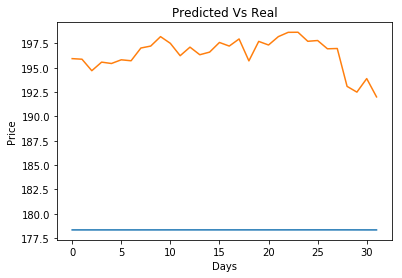

In [51]:
#plt.figure()
#plt.plot(predictions)
#plt.plot(y_testers)
#plt.title('Predicted Vs Real')
#plt.ylabel('Price')
#plt.xlabel('Days')
#plt.show()

In [ ]:
#plt.figure()
#plt.plot(predictions)
#plt.plot(y_testers)
#plt.title('Predicted Vs Real')
#plt.ylabel('Price')
#plt.xlabel('Days')
#plt.show()

In [22]:
print(noDateDF.head())
training_set = noDateDF['spy_close_price'].values

     signal  spy_close_price
0  3.107767          127.495
1  3.107282          127.700
2  3.099757          128.040
3  3.134223          127.710
4  3.135922          128.020


In [23]:
scaler = MinMaxScaler(feature_range = (0,1))
training_set = training_set.reshape(-1,1)
scaled_training_set = scaler.fit_transform(training_set)
print(scaled_training_set.size)

658


In [24]:
x_train = []
y_train = []
for i in range(60,526):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
realPrices = []
for i in range(527,658):
    realPrices.append(training_set[i,0])
realPrices = np.array(realPrices)
print('test sise:',realPrices.size)
print('train:',y_train.size)
#y_train

test sise: 131
train: 466


In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)

(466, 60, 1)


In [26]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 110, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
466/466 [==============================] - 10s 22ms/step - loss: 0.0672
Epoch 2/100
466/466 [==============================] - 3s 6ms/step - loss: 0.0114
Epoch 3/100
466/466 [==============================] - 3s 6ms/step - loss: 0.0032
Epoch 4/100
466/466 [==============================] - 3s 6ms/step - loss: 0.0021
Epoch 5/100
466/466 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 6/100
466/466 [==============================] - 2s 5ms/step - loss: 0.0019
Epoch 7/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 8/100
466/466 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 9/100
466/466 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 10/100
466/466 [==============================] - 2s 5ms/step - loss: 0.0020
Epoch 11/100
466/466 [==============================] - 2

In [28]:
dataset_prices = noDateDF['spy_close_price']
inputs = dataset_prices[len(dataset_prices) - len(realPrices) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60,191):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock = regressor.predict(x_test)
predicted_stock = scaler.inverse_transform(predicted_stock)

## Results Without Dropout

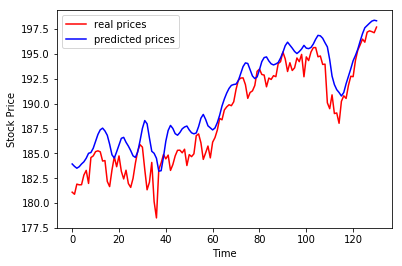

In [29]:
plt.plot(realPrices - 3, color = 'red', label = 'real prices')
plt.plot(predicted_stock, color = 'blue', label = 'predicted prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Results With Dropout
Done With 110 epochs, 32 batch size, .2 dropout, 4 layers, 50 neurons per layer

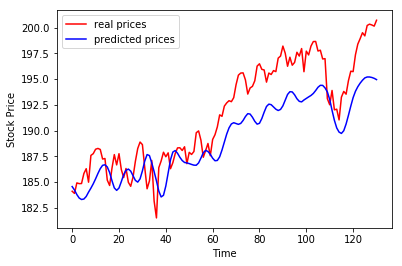

In [165]:
plt.plot(realPrices, color = 'red', label = 'real prices')
plt.plot(predicted_stock, color = 'blue', label = 'predicted prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Done with 100 epochs, 32 batch size, .2 dropout, 4 layers, 50 neurons per layer

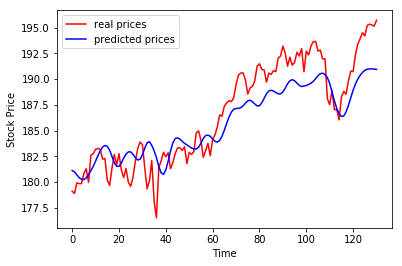

In [194]:
plt.plot(realPrices-5, color = 'red', label = 'real prices')
plt.plot(predicted_stock, color = 'blue', label = 'predicted prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Metrics Without Dropout

In [30]:
print('Evaluation Of Our Neural Network:')
print('Mean Absolute Error:',metrics.mean_absolute_error(realPrices,predicted_stock))
print('Mean Squared Error:',metrics.mean_squared_error(realPrices,predicted_stock))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(realPrices,predicted_stock)))

Evaluation Of Our Neural Network:
Mean Absolute Error: 1.6051630801601253
Mean Squared Error: 3.407692295529353
Root Mean Squared Error: 1.845993579492993


## Metrics With Dropout
Metrics of the 100 epoch dropout from before

In [184]:
print('Evaluation Of Our Neural Network:')
print('Mean Absolute Error:',metrics.mean_absolute_error(realPrices,predicted_stock))
print('Mean Squared Error:',metrics.mean_squared_error(realPrices,predicted_stock))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(realPrices,predicted_stock)))

Evaluation Of Our Neural Network:
Mean Absolute Error: 5.870413049409589
Mean Squared Error: 39.15039455957861
Root Mean Squared Error: 6.257027613777856


Optimal Parameters So Far: 110 epochs, no dropout, 32 batch size, 50 neurons,4 layers, 60 timesteps

## Interpretation Of The Results Of Our Neural Network Evaluation:
The results yielded for MAE, MSE, and RMSE seem to be the best results we can get after time was spent tweaking a few of our parameters such as epochs, dropout, and batch size to while avoiding overfitting to find the best case. However, a limiting factor for this was the amount of epochs we could run since the results showed around 100-120 epochs to be the most effective it took somehwere around 5-10 minutes to run each time.<br><br>
As mentioned in the interpretation of the linear regression model metrics, the mean absolute error is showing us the average error of our prediction to our expected. In this case our error is a bit worse than the linear regression model. As you can see above in our case with no dropout we found the mean absolute error to be 3.5 and in our case with dropout (.2) we have a mean absolute error of 5.87, however, this is variable as rerunning the same code will generate different metrics each time due to the nature of dropouts random nature. While this is not quite as good as the linear regression models results these remain fairly accurate and follow the trend of the market very well albeit at a value slightly below expected.<br><br>
For mean squared error we again fall short of the results obtained by the linear regression model in both the case with dropout and without dropout. The thing to note here though is the difference between with dropout and without dropout value as with dropout's value is 3 times that of without dropout. What this is to say is that if we were visualize this as a line of predicted vs actual we would see that the without dropout graph would show a better fit best line through all the points when compared to the with dropout graph.<br><br>
The final metric which is root mean squared is scaled similarly to the mean absolute error in that without dropout is about half of with dropout. As mentioned previously we'd like to get this number as close down to zero as possible since that would imply a perfect fit to the data and while the without dropout is better than with dropout we can see that it is still not quite there as we have a value of around 3.5 for it<br><br>
Overall using a LSTM model for our predictions worked fairly well. Based off of our results and predictions it seems to have done a good job of predicting. One shortcoming in this case may come from a lack of data. While 600 something rows of data may seem like a decent amount, it's deceptive in that not all of it will be for training since you have to split it into train and test data. Along with this 600 something rows of data is actually really just not that much data overall and more data could've perhaps yielded better overall results.

## Process To Get These Neural Network Results
The first thing when it came to working towards creating the neural network was similar to the linear regression model, we looked at the guides posted on blackboard and tried to do something similar to them and apply it to our data. The first neural network which you'll see commented out above didn't turn out to be very successful as the results of our prediction were more or less the same throughout. By this I mean it predicted every value to be somewhere in the range of 170-175 I believe. The second neural network attempt was more successful and was able to provide decent results. However, the issue with this one was that while it seemed to follow the trends to a certain extent, it was off by at best 10 dollars and at worst about 20 dollars when it came to our best results (however, in retrospect this may have also been due to overfitting as I used epochs in the 1 to 2 thousand range). The final neural network and the one that was settled on that gave the best results by far was approached a bit differently. Instead of just looking at the guide and just essentially taking their code and changing it up to work for our dataset I took the time to actually read through and understand it by downloading the source code off of github and experimenting with their data and code. By doing this I was able to get a much better understanding of why the code was the way it was and was able to apply this to the code above to get the final results.<br><br>
Reminder: I wanted to ask if doing this with a GPU would've been faster since after installing tensorflow-gpu and making sure it was using my GPU in task manager it was actually slower and only using 15% of the GPU. Also when using a google cloud platform virtual machine where I had access to a T4 GPU which was capable of 8.1 TFLOPS and had 16GB of memory it was still slower than my CPU running at 100% capacity. Any ideas why?

# Winner: Linear Regression

## Future Research Possibility Regarding Stock Prediction
When looking at stocks you can't predict stock prices based off of prior prices alone. Even looking at all the data you would normally expect from stocks such as open, close , high, low, yield, etc. we still can't predict with a lot of accuracy because one of the most influential things in the stock market is news about these companies, whether it be a scandal or the build up to the release of a new product like Apple and iPhones or Nvidia and new lines of graphics cards. A possible avenue to get past this and create an even more accurate stock predictor is to use news analytics. For a person it is just not feasible to go through the insane amount of data published every day about every company but a computer can do that. It can look at social media posts about a product leading up to release to figure out how many people  are talking about and interested in it or it can pick up on a series of articles talking about a company executive and piece together a scandal brewing before anyonelse knows. Whether this is a feasible pathway to more accurate stock market prediction or if there is a serious flaw with my logic I'm not sure. Below is a link to a competition on kaggle about this idea where the past 12 years of data can be found on relevant stock info and news and alerts.<br><br>
Link to Data: https://www.kaggle.com/c/two-sigma-financial-news/data